In [1]:
# import all important libraries thats we need for this project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# First we read data through

data = pd.read_csv("E://csv_files for self project//Social_Network_Ads.csv")

#### Exploratory Data Analyasis

In [3]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
data.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [5]:
data.shape

(400, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
# Find total null values in data
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
# Now we check in any catgorical variable in data

categorical = [i for i in data.columns if data[i].dtype==object]

print('Total categorical {} variable in data'.format(len(categorical)))

print('The categorical variables are', categorical)

Total categorical 1 variable in data
The categorical variables are ['Gender']


In [9]:
# we see there are only one categorical variable

data[categorical].head()

,Gender
0,Male
1,Male
2,Female
3,Female
4,Male


In [10]:
# Now we check cardinality leabels in categorical variables

for i in categorical:
    print(i,'canotains',len(data[i].unique()),'labels')

Gender canotains 2 labels


In [11]:
# check dtype of categorical variable

data['Gender'].dtype

dtype('O')

In [12]:
# check the frqency labels

data.Gender.value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

#### Data visulisation 

<AxesSubplot:xlabel='Gender', ylabel='Age'>

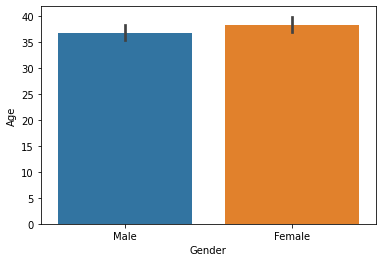

In [13]:
# Gender vs Age

sns.barplot(x='Gender',y='Age',data=data)

<AxesSubplot:xlabel='Gender', ylabel='EstimatedSalary'>

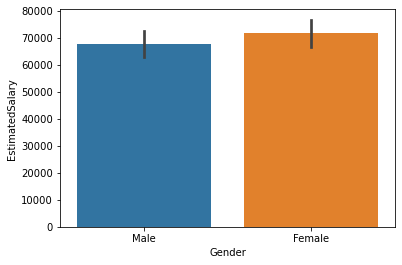

In [14]:
# Gender VS salary

sns.barplot(x='Gender',y='EstimatedSalary',data=data)

<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

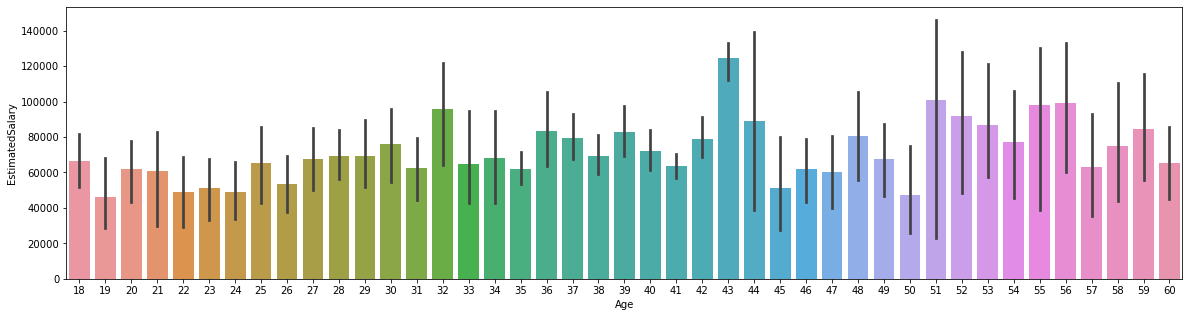

In [15]:
# Age vs salary

plt.figure(figsize=(20,5))
sns.barplot(x='Age',y='EstimatedSalary',data=data)

<AxesSubplot:xlabel='Purchased', ylabel='count'>

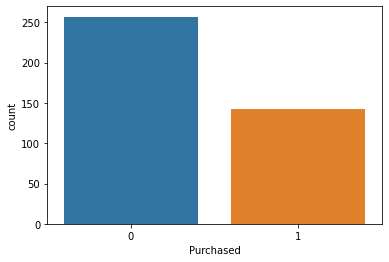

In [16]:
# countplot

sns.countplot('Purchased', data=data)

<AxesSubplot:xlabel='Gender', ylabel='EstimatedSalary'>

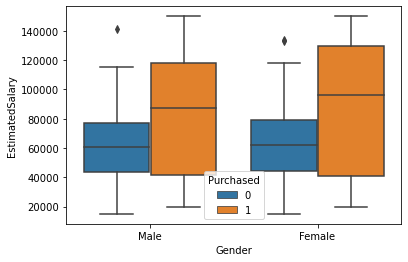

In [17]:
# boxplot

sns.boxplot('Gender', 'EstimatedSalary', data=data, hue = 'Purchased')

#### Data Modelling

In [18]:
# drop user id because of no use

data.drop('User ID', axis = 1, inplace=True)

In [19]:
# Gender features no effect on purchased then we removed Gender from  the dataset

data.drop('Gender', inplace=True, axis = 1)

In [20]:
# check dataset again
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


#### Model Training

In [21]:
X = data.drop('Purchased', axis = 1)
y = data['Purchased']

In [22]:
X.shape, y.shape

((400, 2), (400,))

In [23]:
# import libraries for machine learning

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [24]:
# split data 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [25]:
# Normalizing the data

std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [26]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [27]:
# model accuracy

accuracy = logmodel.score(X_test,y_test)
print(accuracy*100,'%')

89.0 %


In [28]:
# prediction

predictions = logmodel.predict(X_test)

In [29]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [30]:
# now we check classification report

from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



In [31]:
# confusion matrix

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[65,  3],
       [ 8, 24]], dtype=int64)

#### SVM Algorithm 

In [32]:
# SVC
# important library for SVC

from sklearn.svm import SVC

In [33]:
model = SVC() 
model.fit(X_train,y_train)

SVC()

In [34]:
# model accuracy

accuracy = model.score(X_test,y_test)
print(accuracy*100,'%')

93.0 %


In [35]:
# prediction

predictions = model.predict(X_test)

In [36]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [37]:
# now we check classification report

from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



In [38]:
# confusion matrix

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[64,  4],
       [ 3, 29]], dtype=int64)